In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

In [16]:
# Replace directory with your directory to the database files
# Load CSV Data
train_df = pd.read_csv("Dataset/sign_mnist_train.csv")
test_df = pd.read_csv("Dataset/sign_mnist_test.csv")

In [17]:
# Explore the data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [18]:
y_train = train_df["label"]
y_test = test_df["label"]

del train_df["label"]
del test_df["label"]

x_train = train_df.values
x_test = test_df.values

In [19]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (27455, 784)
y_train shape: (27455,)
x_test shape: (7172, 784)
y_test shape: (7172,)


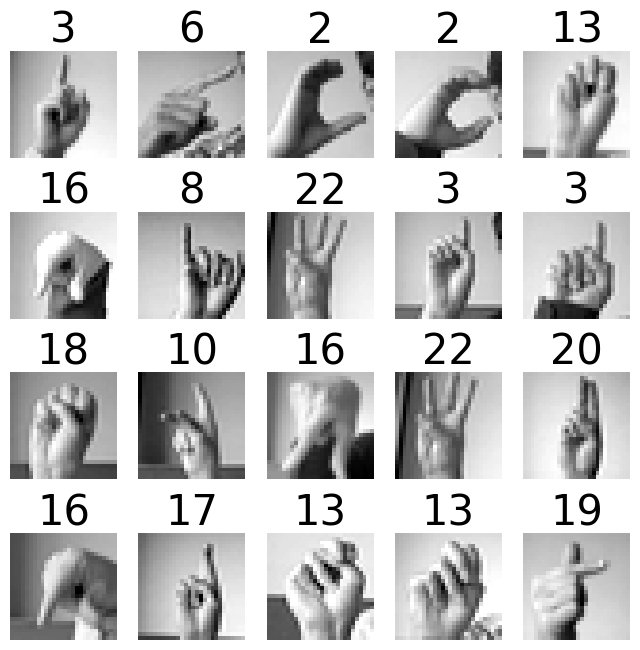

In [20]:
num_images = 20

plt.figure(figsize=(8, 8))

for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28, 28)
    plt.subplot(4, 5, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.show()

In [21]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train min:", x_train.min())
print("x_train max:", x_train.max())

x_train min: 0.0
x_train max: 1.0


In [22]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(units = 512, activation='relu'),
    tf.keras.layers.Dense(units = 25, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 25)                12825     
                                                                 
Total params: 677401 (2.58 MB)
Trainable params: 677401 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Now proceed with model training
model.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
858/858 [==============================] - 5s 6ms/step - loss: 1.9384 - accuracy: 0.3883
Epoch 2/20
858/858 [==============================] - 5s 6ms/step - loss: 0.9594 - accuracy: 0.6794
Epoch 3/20
858/858 [==============================] - 5s 6ms/step - loss: 0.5617 - accuracy: 0.8081
Epoch 4/20
858/858 [==============================] - 5s 5ms/step - loss: 0.3814 - accuracy: 0.8746
Epoch 5/20
858/858 [==============================] - 5s 6ms/step - loss: 0.2730 - accuracy: 0.9174
Epoch 6/20
858/858 [==============================] - 5s 6ms/step - loss: 0.2312 - accuracy: 0.9345
Epoch 7/20
858/858 [==============================] - 5s 6ms/step - loss: 0.2093 - accuracy: 0.9480
Epoch 8/20
858/858 [==============================] - 5s 6ms/step - loss: 0.1966 - accuracy: 0.9526
Epoch 9/20
858/858 [==============================] - 5s 6ms/step - loss: 0.1762 - accuracy: 0.9598
Epoch 10/20
858/858 [==============================] - 8s 9ms/step - loss: 0.1719 - accuracy: 0.9637

In [26]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 2s 7ms/step - loss: 1.4295 - accuracy: 0.8210
Accuracy of the model is -  82.09704160690308 %


In [27]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)



225/225 [==============================] - 1s 6ms/step


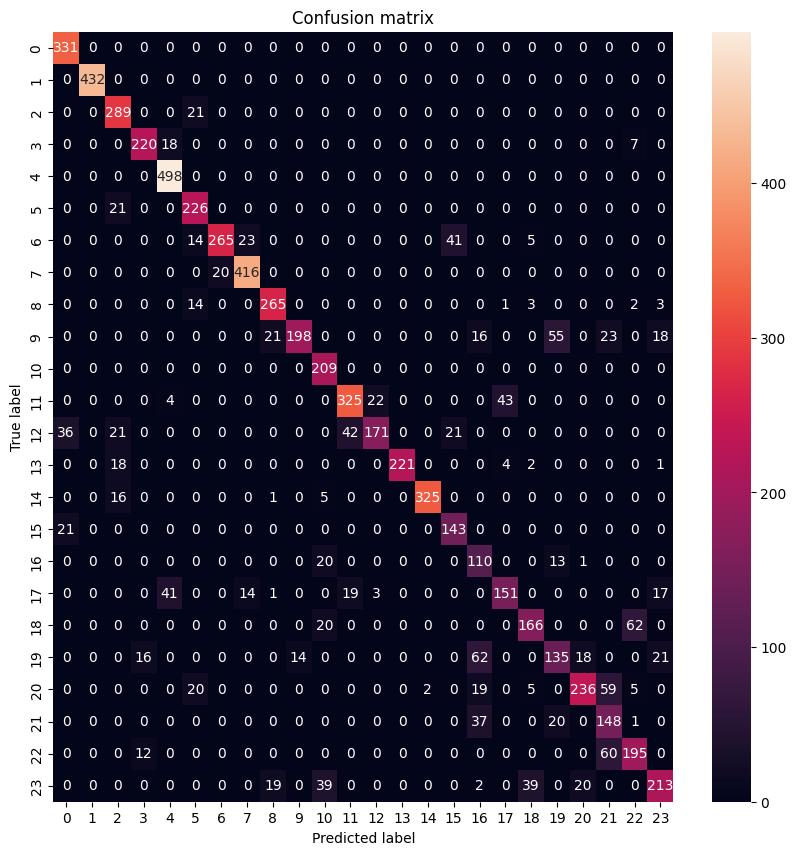

In [28]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# print(cm)